In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from plotly import tools
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os, json, itertools

from glob import glob
from tqdm import tqdm
from sklearn.grid_search import ParameterGrid
from sklearn import *
from copy import deepcopy
from scipy.stats.stats import pearsonr, spearmanr
from shapely.geometry import Polygon
from collections import Counter
from modules import correlation, evaluation, query, residual, visualization

sns.set(color_codes=True)

loo = model_selection.LeaveOneOut()

data_dir = os.path.join('..','..','data')

def plot(filename):
    df_pred = pd.read_csv(os.path.join(data_dir,'dengue-cases','subdistrict-plotinfo', filename)) 
    df_pred.set_index('addrcode', inplace=True)
    
    
    plt.figure(figsize=((10,10)))
    sns.set_context('poster', font_scale=1)
#     sns.set()
    fig = sns.regplot(x='actual',y='predicted',data=df_pred, fit_reg=True, scatter_kws={'alpha':0.65})
    fig.set_title(filename)
    plt.plot([df_pred.actual.min(), df_pred.actual.max()],[df_pred.actual.min(), df_pred.actual.max()],color='gray', lw=3, linestyle='--')
    
    pearson_val = pearsonr(df_pred.actual,df_pred.predicted)
    spearman_val = spearmanr(df_pred.actual,df_pred.predicted)
    r2 = metrics.r2_score(df_pred.actual,df_pred.predicted)
    
    area_level, province, model = filename[:-13].split('_')

    if province == 'all': province = 'All Three Provinces'
    elif province == 'bangkok': province = 'Bangkok'
    elif province == 'krabi': province = 'Krabi'
    elif province == 'nakhon': province = 'Nakhon-Si'
    
    if model == 'model1': model   = 'BS per Person as Features'
    elif model == 'model2': model = 'BS per area as Features'
    elif model == 'model3': model = 'BS per image area as Features'
    elif model == 'model4': model = 'Population Density as Feature'
    elif model == 'model5': model = 'Population Density & BS per Person as Features'
    elif model == 'model6': model = 'Population Density & BS per Area as Features'
    elif model == 'model7': model = 'Population Density & BS per Image Area as Features'
        
    
    _=fig.set_title(
        province + ' ('+str(len(df_pred))+' data points), ' + model + \
        '\nR-squared: '+str(round(r2,4)) + \
        '\nPearson: '+str(round(pearson_val[0],4))+ ', p-value: '+str(round(pearson_val[1],4))+ \
        '\nSpearman: '+str(round(spearman_val[0],4))+', p-value: '+str(round(spearman_val[1],4))
    )
    _=fig.set_xlabel('Dengue Cases per 10,000 People')
    _=fig.set_ylabel('Predicted Dengue Cases')
    _=fig.figure.savefig('DC-results/'+filename[:-13]+'.png', bbox_inches='tight')
    _=fig.figure.savefig('DC-results/'+filename[:-13]+'.svg', bbox_inches='tight')

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

/usr/local/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.

/usr/local/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20



In [2]:
# for path in sorted(glob(os.path.join(data_dir,'dengue-cases','subdistrict-plotinfo', '*'))):
#     print(os.path.basename(path))

In [3]:
# plot('Subdist_all_model1_plotinfo.csv')
# plot('Subdist_all_model4_plotinfo.csv')
# plot('Subdist_all_model5_plotinfo.csv')

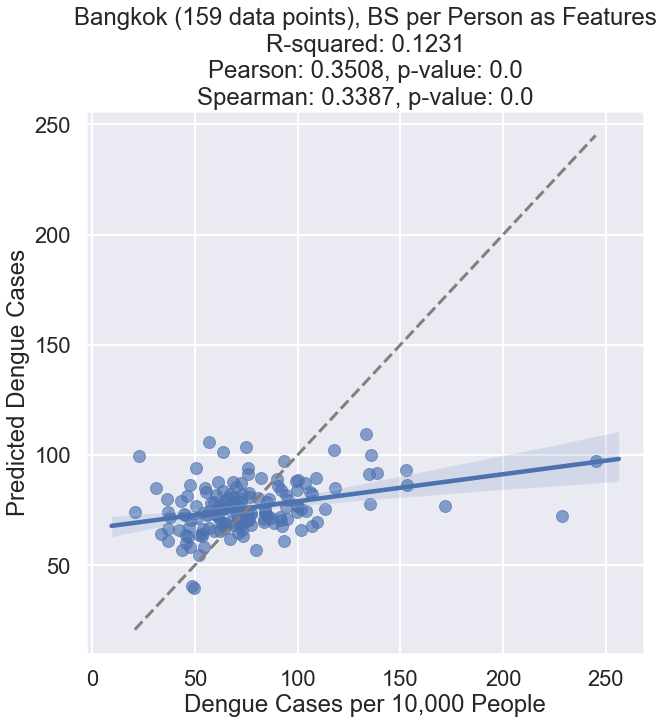

In [4]:
plot('Subdist_bangkok_model1_plotinfo.csv')
# plot('Subdist_bangkok_model4_plotinfo.csv')
# plot('Subdist_bangkok_model5_plotinfo.csv')

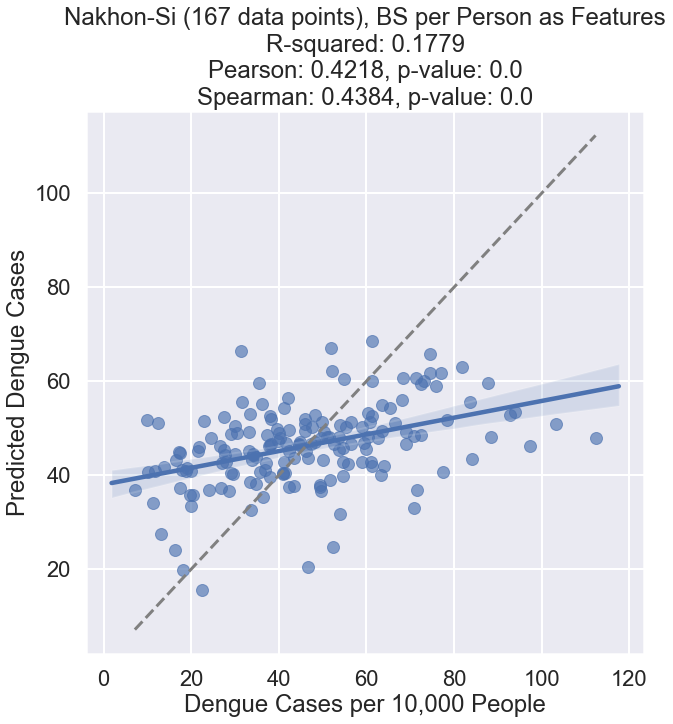

In [5]:
plot('Subdist_nakhon_model1_plotinfo.csv')
# plot('Subdist_nakhon_model4_plotinfo.csv')
# plot('Subdist_nakhon_model7_plotinfo.csv')

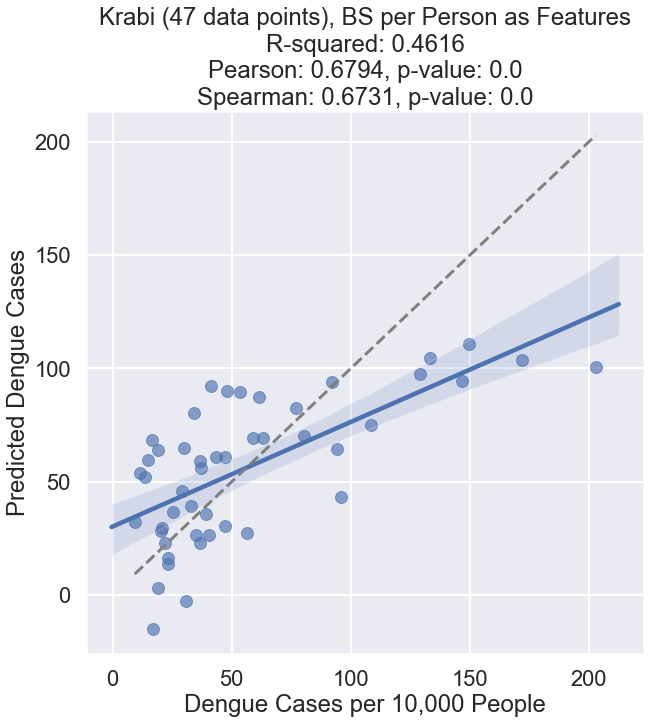

In [6]:
plot('Subdist_krabi_model1_plotinfo.csv')
# plot('Subdist_krabi_model4_plotinfo.csv')
# plot('Subdist_krabi_model6_plotinfo.csv')